In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# load dataset
folder = '/content/drive/My Drive/Colab Notebooks/HIA303 Health Data Analytics/'

In [11]:
# This is to show there is 16 missing values represented by (?) in the Bare_Nuclei Column - min =0
import pandas as pd
headers = ["code_number","Clump_Thickness","Cell_Size_Uniformity","Cell_Shape_Uniformity","Marginal_Adhesion","Epithelial_Cell_Size","Bare_Nuclei","Chromatin","Normal_Nucleoli","Mitoses","Class"]
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/HIA303 Health Data Analytics/breast-cancer-wisconsin.data.csv',    
         header=None, index_col=['code_number'], na_values='?', names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
data.describe()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Chromatin,Normal_Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207582,2.807153,3.216023,3.463948,3.437768,2.867525,1.590129,2.689700
std,2.815741,3.051459,2.971809,2.855208,2.214300,3.640435,2.438364,3.053321,1.714936,0.951176
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


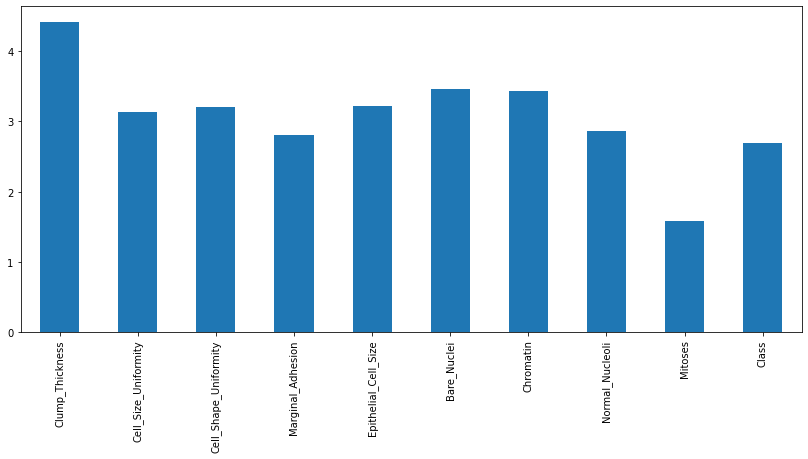

In [12]:
# Data Skewness
import seaborn as sns
data_mean = data.describe().loc['mean']
data_mean.plot(kind='bar', figsize=(14,6))

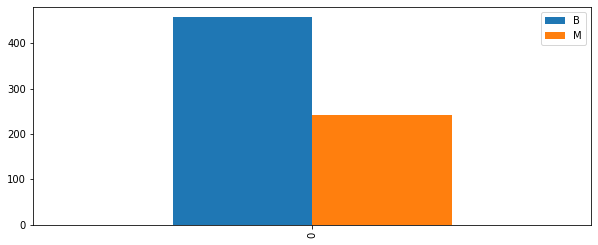

In [13]:
# unbalanced dataset issue
data_B = data[data['Class'] == 2]
data_M = data[data['Class'] == 4]
B_M_data = {'B': [data_B.shape[0]], 'M': [data_M.shape[0]]}
B_M_df = pd.DataFrame(data=B_M_data)
B_M_df.plot(kind='bar', figsize=(10,4))

In [15]:
# after cleaning the data
import pandas as pd
data= pd.read_csv('/content/drive/My Drive/Colab Notebooks/HIA303 Health Data Analytics/breast-cancer-wisconsin-imputed.csv')
data

,sample_id,cl_thcknss,size_cell_un,shape_cell_un,marg_adhesion,size_cell_single,bare_nucl,bl_chrmatn,nrml_nucleo,mitoses,class
0,1000025,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2
1,1002945,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2
2,1015425,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2
3,1016277,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2
4,1017023,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2
695,841769,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2
696,888820,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4
697,897471,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,4


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sample_id         699 non-null    int64  
 1   cl_thcknss        699 non-null    float64
 2   size_cell_un      699 non-null    float64
 3   shape_cell_un     699 non-null    float64
 4   marg_adhesion     699 non-null    float64
 5   size_cell_single  699 non-null    float64
 6   bare_nucl         699 non-null    float64
 7   bl_chrmatn        699 non-null    float64
 8   nrml_nucleo       699 non-null    float64
 9   mitoses           699 non-null    float64
 10  class             699 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 60.2 KB


In [17]:
data.describe

<bound method NDFrame.describe of      sample_id  cl_thcknss  size_cell_un  shape_cell_un  marg_adhesion  \
0      1000025         5.0           1.0            1.0            1.0   
1      1002945         5.0           4.0            4.0            5.0   
2      1015425         3.0           1.0            1.0            1.0   
3      1016277         6.0           8.0            8.0            1.0   
4      1017023         4.0           1.0            1.0            3.0   
..         ...         ...           ...            ...            ...   
694     776715         3.0           1.0            1.0            1.0   
695     841769         2.0           1.0            1.0            1.0   
696     888820         5.0          10.0           10.0            3.0   
697     897471         4.0           8.0            6.0            4.0   
698     897471         4.0           8.0            8.0            5.0   

     size_cell_single  bare_nucl  bl_chrmatn  nrml_nucleo  mitoses  class  
0

In [18]:
# Let's explore the dataset and do an overview of visualizations
print(data.loc[10])

# Print the shape of the dataset
print(data.shape)

sample_id           1035283.0
cl_thcknss                1.0
size_cell_un              1.0
shape_cell_un             1.0
marg_adhesion             1.0
size_cell_single          1.0
bare_nucl                 1.0
bl_chrmatn                3.0
nrml_nucleo               1.0
mitoses                   1.0
class                     2.0
Name: 10, dtype: float64
(699, 11)


In [21]:
#changing the value of the column id =1 as machine learning screening on id will not provide us insight
data.drop(['sample_id'], 1, inplace=True)

<ipython-input-21-6f995181f70a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(['sample_id'], 1, inplace=True)


In [22]:
# benign versus malignant
data['class'].value_counts()

# Therefore, tumours for benign are more than of malignant in the dataset

2    458
4    241
Name: class, dtype: int64

Apply Knn model to predict the tumour is benign or malignant

In [24]:
import numpy as np
from sklearn import preprocessing, model_selection, neighbors
x = np.array(data.drop(['class'], 1))
y = np.array(data['class'])

# create training and testing samples:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)

# define the classifier:
clf = neighbors.KNeighborsClassifier()

# train the classifier:
clf.fit(x_train,y_train)

# test and print the accuracy:
accuracy = clf.score(x_test,y_test)
print (accuracy)

0.9714285714285714


<ipython-input-24-ad1b994f66c2>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(data.drop(['class'], 1))


In [25]:
from random import randint
# Next, we'll test random values to see what we get out
example_measures = np.array([[7,3,2,10,5,10,5,4,4],[4,2,1,1,1,2,3,2,1]])

example_measures = example_measures.reshape(len(example_measures),-1)
prediction = clf.predict(example_measures)
print(prediction)

[4 2]


KNN Technique and SVM Method

<ipython-input-26-495bbab776ec>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=np.array(data.drop(['class'],1))


[[159   5]
 [  2  79]]
Accuracy score of train KNN
100.0
Accuracy score of test KNN
97.14285714285714
[[160   4]
 [  4  77]]
Accuracy score of train KNN
96.69603524229075
Accuracy score of test KNN
96.73469387755102
[[160   4]
 [  2  79]]
Accuracy score of train KNN
96.91629955947137
Accuracy score of test KNN
97.55102040816327
[[160   4]
 [  3  78]]
Accuracy score of train KNN
95.81497797356829
Accuracy score of test KNN
97.14285714285714
[[160   4]
 [  2  79]]
Accuracy score of train KNN
96.91629955947137
Accuracy score of test KNN
97.55102040816327
[[160   4]
 [  3  78]]
Accuracy score of train KNN
96.47577092511013
Accuracy score of test KNN
97.14285714285714
[[160   4]
 [  2  79]]
Accuracy score of train KNN
96.0352422907489
Accuracy score of test KNN
97.55102040816327
[[160   4]
 [  2  79]]
Accuracy score of train KNN
96.25550660792952
Accuracy score of test KNN
97.55102040816327
[[159   5]
 [  2  79]]
Accuracy score of train KNN
96.0352422907489
Accuracy score of test KNN
97.142

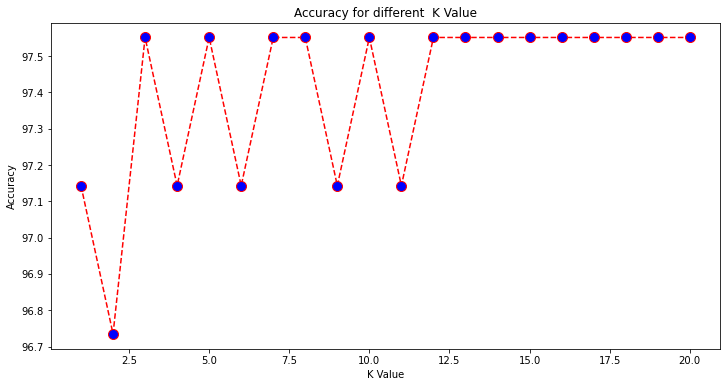

In [26]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

#assign x and y
X=np.array(data.drop(['class'],1))
y=np.array(data['class'])

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#principle component analysis

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance=pca.explained_variance_ratio_

# Fitting KNN to the Training set

from sklearn.neighbors import KNeighborsClassifier
knn = []
for i in range(1,21):
            
    classifier = KNeighborsClassifier(n_neighbors=i)
    trained_model=classifier.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )
    
    # Predicting the Test set results
    
    y_pred = classifier.predict(X_test)
    
    # Making the Confusion Matrix
    
    from sklearn.metrics import confusion_matrix
    
    cm_KNN = confusion_matrix(y_test, y_pred)
    print(cm_KNN)
    print("Accuracy score of train KNN")
    print(accuracy_score(y_train, trained_model.predict(X_train))*100)
    
    print("Accuracy score of test KNN")
    print(accuracy_score(y_test, y_pred)*100)
    
    knn.append(accuracy_score(y_test, y_pred)*100)
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 21),knn, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
plt.title('Accuracy for different  K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy') 

# Fitting SVM to the Training set

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

trained_model=classifier.fit(X_train,y_train)
trained_model.fit(X_train,y_train )


# Predicting the Test set results

y_pred = classifier.predict(X_test)

# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm_SVM = confusion_matrix(y_test, y_pred)
print(cm_SVM)
print("Accuracy score of train SVM")
print(accuracy_score(y_train, trained_model.predict(X_train))*100)

print("Accuracy score of test SVM")
print(accuracy_score(y_test, y_pred)*100)


kNN Accuracy Analysis

In [27]:
# Define input and output
X = np.array(data.iloc[:, 1:])
y = np.array(data['class'])
# Splitting data to training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)
# Using Sklearn
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)




KNeighborsClassifier(n_neighbors=13)

In [28]:
# Prediction Score
knn.score(X_test, y_test)

0.9696969696969697

In [29]:
# Performing Cross Validation
neighbors = []
cv_scores = []
  
from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is  3 


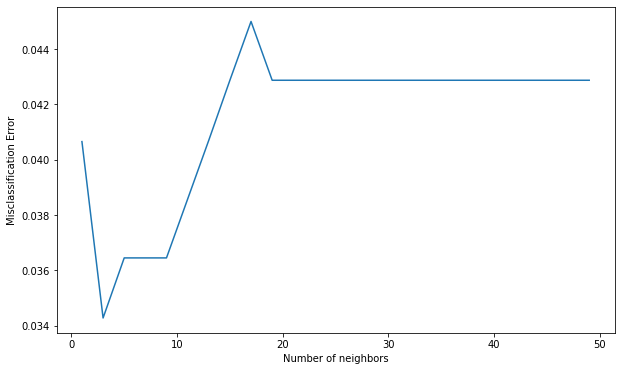

In [30]:
# Misclassification error versus k
MSE = [1-x for x in cv_scores]
  
# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)
  
# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

SVM Analysis - Linear kernel

In [32]:
from sklearn.model_selection import train_test_split
 
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix
 
target = data["class"]
features = data.drop(["class"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.2, random_state = 10)
from sklearn.svm import SVC
 
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)
 
prediction = svc_model .predict(X_test)
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9731663685152058
0.9642857142857143


In [33]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[95  2]
 [ 3 40]]


In [34]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

SVC()

In [35]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9767441860465116
0.9642857142857143


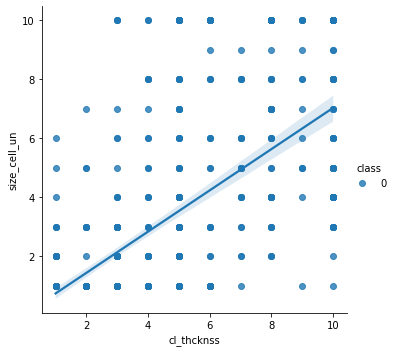

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x = 'cl_thcknss', y = 'size_cell_un', hue = 'class', data = data)
# as can shown from the result, mostly are benign

In [41]:
print(data.tail)

<bound method NDFrame.tail of      cl_thcknss  size_cell_un  shape_cell_un  marg_adhesion  size_cell_single  \
0           5.0           1.0            1.0            1.0               2.0   
1           5.0           4.0            4.0            5.0               7.0   
2           3.0           1.0            1.0            1.0               2.0   
3           6.0           8.0            8.0            1.0               3.0   
4           4.0           1.0            1.0            3.0               2.0   
..          ...           ...            ...            ...               ...   
694         3.0           1.0            1.0            1.0               3.0   
695         2.0           1.0            1.0            1.0               2.0   
696         5.0          10.0           10.0            3.0               7.0   
697         4.0           8.0            6.0            4.0               3.0   
698         4.0           8.0            8.0            5.0               4.0  

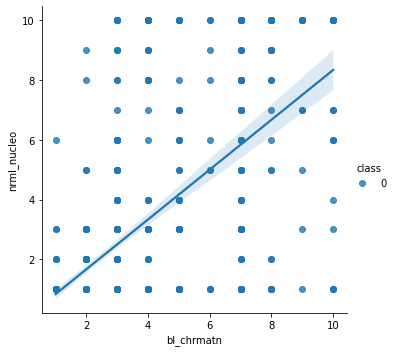

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x = 'bl_chrmatn', y = 'nrml_nucleo', hue = 'class', data = data)

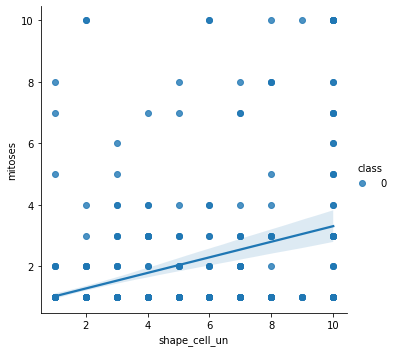

In [43]:

import matplotlib.pyplot as plt
sns.lmplot(x = 'shape_cell_un', y = 'mitoses', hue = 'class', data = data)

In [44]:
# Model specific Library
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

data.keys()

Index(['cl_thcknss', 'size_cell_un', 'shape_cell_un', 'marg_adhesion',
       'size_cell_single', 'bare_nucl', 'bl_chrmatn', 'nrml_nucleo', 'mitoses',
       'class'],
      dtype='object')

In [45]:
#Split the data into X and y
X = data.iloc[:, 0:-1]
y = data.iloc[:,-1]

In [46]:
X.shape, y.shape

((699, 9), (699,))

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 999)

In [48]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((559, 9), (559,), (140, 9), (140,))

In [49]:
#Train Naive Bayes Classifier Model
#Gaussian Naive Bayes
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [50]:
clf.score(X_val, y_val)

1.0

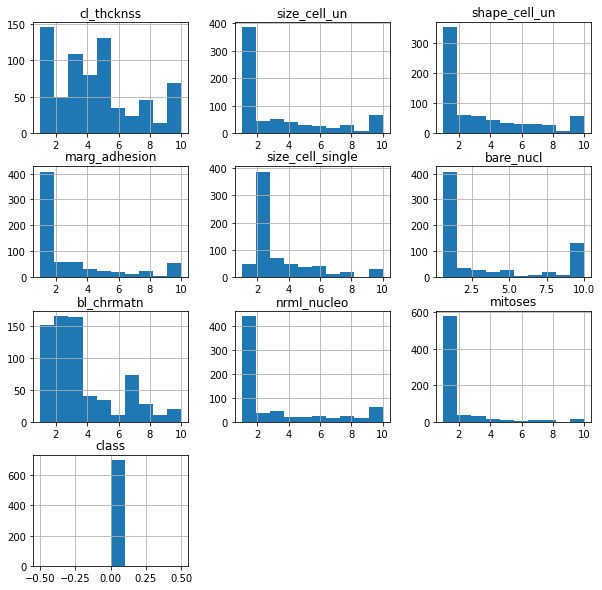

In [51]:
# Plot histograms for each variable
data.hist(figsize = (10, 10))
plt.show()

In [58]:
data.head()

,cl_thcknss,size_cell_un,shape_cell_un,marg_adhesion,size_cell_single,bare_nucl,bl_chrmatn,nrml_nucleo,mitoses,class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0


In [61]:
data.shape

(699, 10)

In [62]:
# Scaling the dataset
from sklearn import preprocessing
datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:10]))
datas.columns = list(data.iloc[:,1:10].columns)
datas['class'] = data['class']
datas.head()

,size_cell_un,shape_cell_un,marg_adhesion,size_cell_single,bare_nucl,bl_chrmatn,nrml_nucleo,mitoses,class
0,-0.699995,-0.743299,-0.633247,-0.549561,-0.698698,-0.179662,-0.611825,-0.343912,0
1,0.283845,0.266875,0.768621,1.710106,1.790166,-0.179662,-0.284112,-0.343912,0
2,-0.699995,-0.743299,-0.633247,-0.549561,-0.422158,-0.179662,-0.611825,-0.343912,0
3,1.595632,1.613773,-0.633247,-0.097628,0.130923,-0.179662,1.354454,-0.343912,0
4,-0.699995,-0.743299,0.067687,-0.549561,-0.698698,-0.179662,-0.611825,-0.343912,0


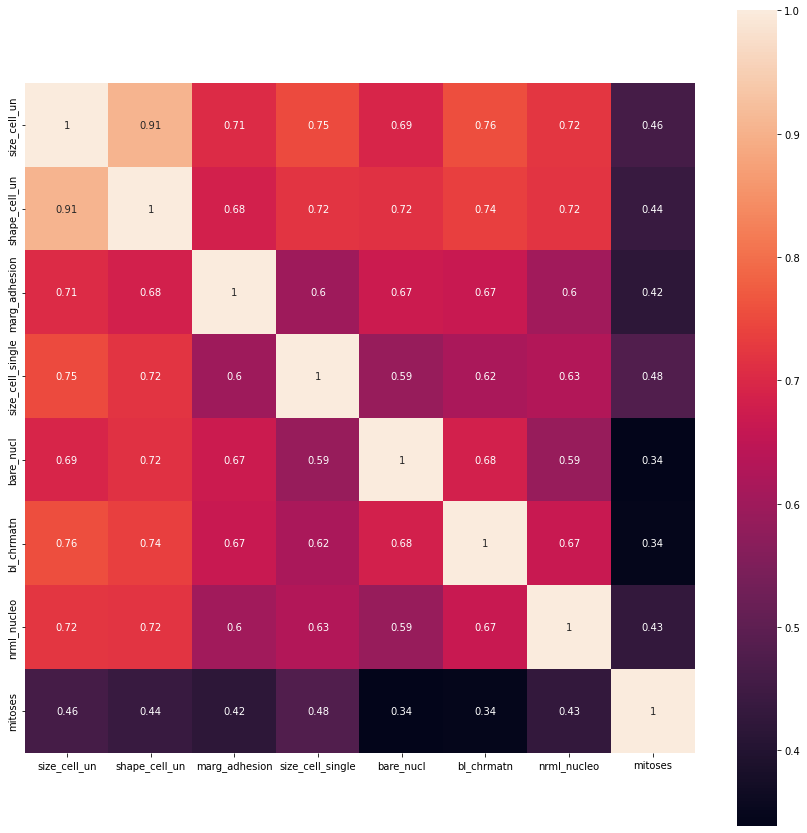

In [70]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
features = ['size_cell_un','shape_cell_un','marg_adhesion','size_cell_single', 'bare_nucl', 'bl_chrmatn','nrml_nucleo', 'mitoses']
#draw a heatmap between mean features and class
plt.figure(figsize=(15,15))
heat = sns.heatmap(datas[features].corr(), vmax=1, square=True, annot=True)

Text(0.5, 1.0, 'PCA Scatter Plot')

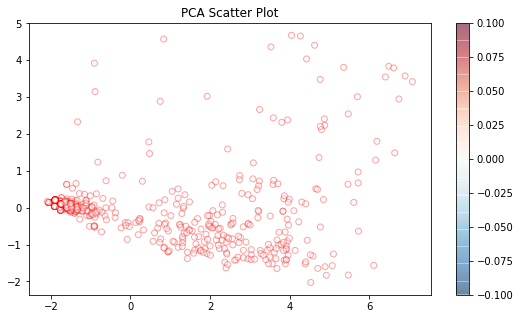

In [72]:
data_drop = datas.drop('class',axis=1)
data_drop = data_drop[features]
# Principal component analysis and it's Scatter Plot
from sklearn.decomposition import PCA 
X = data_drop.values
pca = PCA(n_components=2) #Binary Classifier
pca = pca.fit_transform(X)
plt.figure(figsize = (9,5))
plt.scatter(pca[:,0],pca[:,1], c = datas['class'], cmap = "RdBu_r", edgecolor = "Red", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 699 samples in 0.001s...
[t-SNE] Computed neighbors for 699 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 699 / 699
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.495483
[t-SNE] KL divergence after 2050 iterations: 0.555013


Text(0.5, 1.0, 't-SNE Scatter Plot')

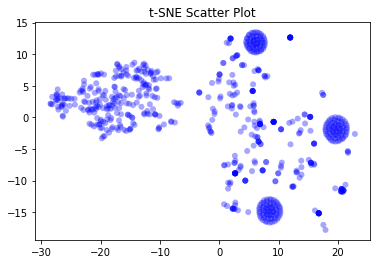

In [74]:
# Principal component analysis and it's Scatter Plot
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
tsne = tsne.fit_transform(X)
plt.scatter(tsne[:,0],tsne[:,1],  c = datas['class'], cmap = "winter", edgecolor = "None", alpha=0.35)
plt.title('t-SNE Scatter Plot')